In [5]:
from __future__ import absolute_import

from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

from src.voronoi import VoronoiPolygons 

%config IPCompleter.greedy=True

## 1. Creating Voronoi polygons


In [6]:
voronoi_polygons = VoronoiPolygons(N=25)

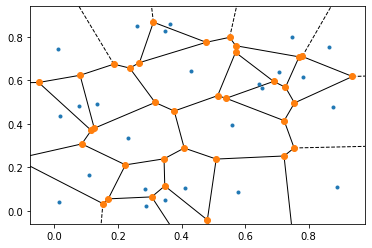

In [7]:
voronoi_plot_2d(voronoi_polygons.vor)
plt.show()

## 2. Replacing each point by the centroid of the region related to this point

Each region is convex, so the centroid is always inside the region. We're skipping regions on the edge of the grid. <br>
It's hard to compute centroid for them, we don't know about the vertices outside the grid.

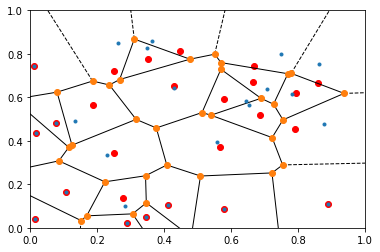

In [8]:
voronoi_plot_2d(voronoi_polygons.vor)
plt.scatter(voronoi_polygons.centroids[:,0], voronoi_polygons.centroids[:,1], c='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## 3. Re-generating Voronoi regions using new points (centroids)

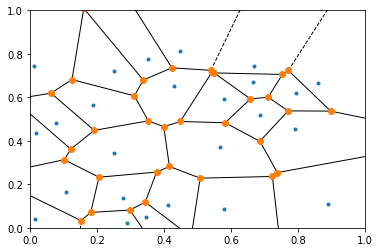

In [9]:
voronoi_plot_2d(voronoi_polygons.vor_c)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## 4. Converting infitite vertices to finite ones

Then replacing vertices outside $[0,1]^2$ region by the intersection points.

In [10]:
new_regions, new_vertices, new_centroids = VoronoiPolygons.find_new_polygons(
    vor=voronoi_polygons.vor
)

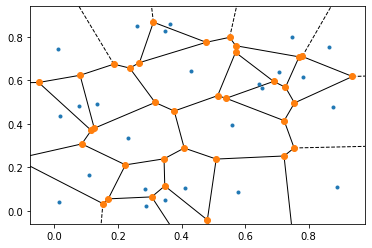

In [11]:
voronoi_plot_2d(voronoi_polygons.vor)
plt.show()

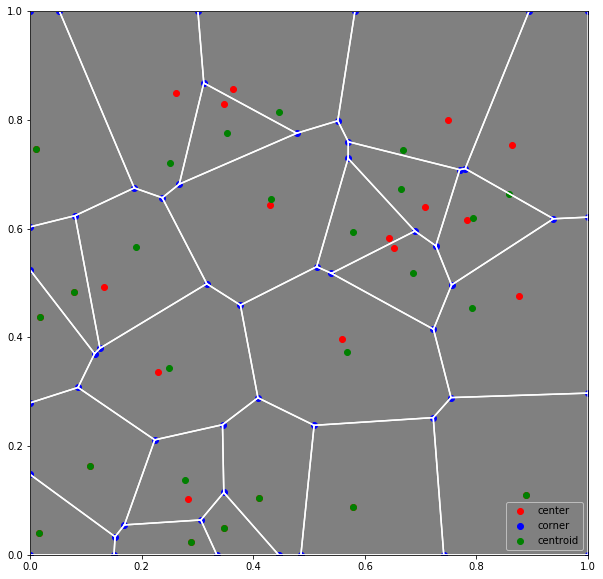

In [12]:
plt.figure(figsize=(10, 10))
plt.rcParams['axes.facecolor'] = 'grey'

for region in new_regions:
    region.append(region[0])
    coords = new_vertices[region]
    plt.plot(coords[:, 0], coords[:, 1],c='white')

plt.scatter(voronoi_polygons.points[:, 0], voronoi_polygons.points[:, 1], c='red', label='center')
plt.scatter(new_vertices[:, 0], new_vertices[:, 1], c='blue', label='corner')
plt.scatter(voronoi_polygons.centroids[:, 0], voronoi_polygons.centroids[:, 1], c='green', label='centroid')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

## 5. Generate neighbours

In [13]:
neighbors, intersecions =  VoronoiPolygons.generate_neighbours(
    vor=voronoi_polygons.vor,
    regions=new_regions,
    vertices=new_vertices,
)

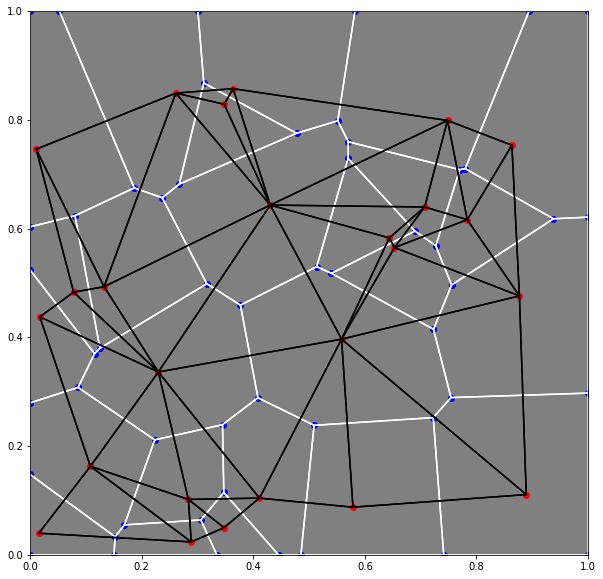

In [14]:
plt.figure(figsize=(10,10))
plt.rcParams['axes.facecolor'] = 'grey'

for region in new_regions:
    region.append(region[0])
    coords = new_vertices[region]
    plt.plot(coords[:, 0], coords[:, 1],c='white')
    
for i,n_list in enumerate(neighbors):
    p1 = voronoi_polygons.points[i]
    for i2 in n_list:
        p2 = voronoi_polygons.points[i2]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black')
        
plt.scatter(voronoi_polygons.points[:, 0], voronoi_polygons.points[:, 1], c='red')
plt.scatter(new_vertices[:, 0], new_vertices[:, 1], c='blue')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## 6. All previous steps together

In [15]:
vorpoints, points, new_vertices, new_regions, neighbors, intersecions \
    = voronoi_polygons.generate_Voronoi(iterations=2)

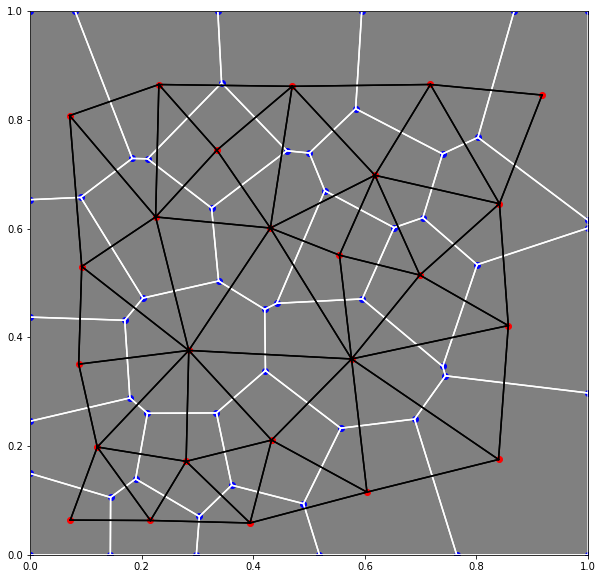

In [16]:
VoronoiPolygons.plot_Voronoi_grid(
    points=voronoi_polygons.points, vertices=new_vertices, regions=new_regions, neighbors=neighbors
)

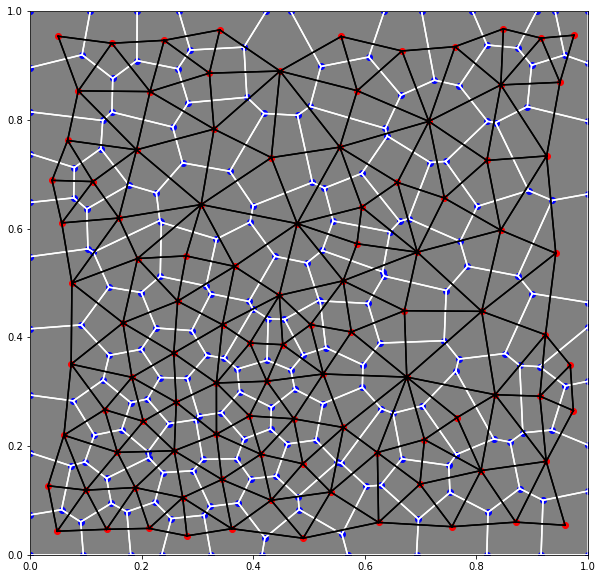

In [17]:
voronoi_polygons = VoronoiPolygons(N=100)

vorpoints, points, new_vertices, new_regions, neighbors, intersecions \
    = voronoi_polygons.generate_Voronoi(iterations=2)

VoronoiPolygons.plot_Voronoi_grid(
    points=voronoi_polygons.points, vertices=new_vertices, regions=new_regions, neighbors=neighbors
)

## 7. Map representation


In [24]:
from src.map import Graph

In [25]:
%%time
g = Graph(N=250, iterations=2)

Wall time: 11.5 s


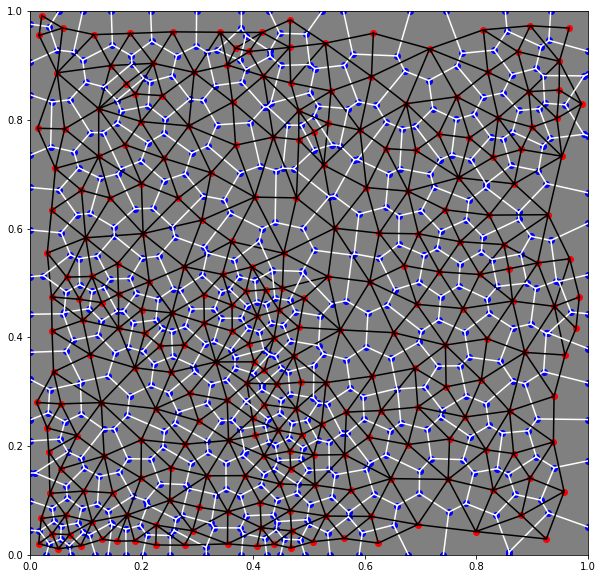

Wall time: 3.36 s


In [26]:
%%time
g.plot_map()

## 8. Terrain split and plotting

In [27]:
from src.terrain import assign_terrain_types_to_graph

In [28]:
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)

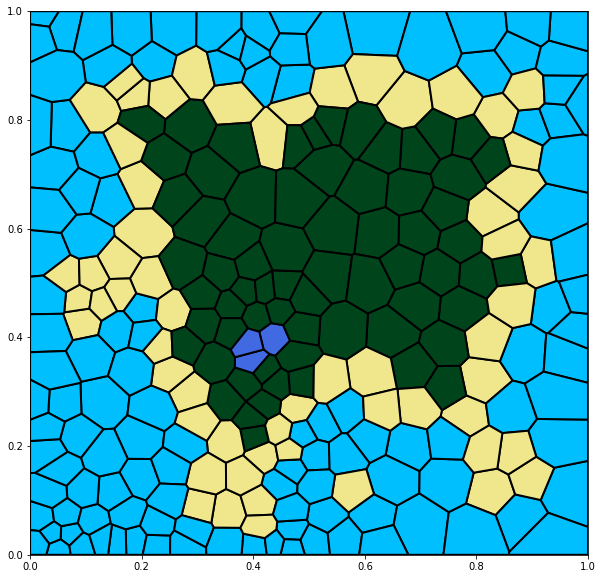

In [29]:
g.plot_full_map()

## 9. Elevation

In [30]:
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()

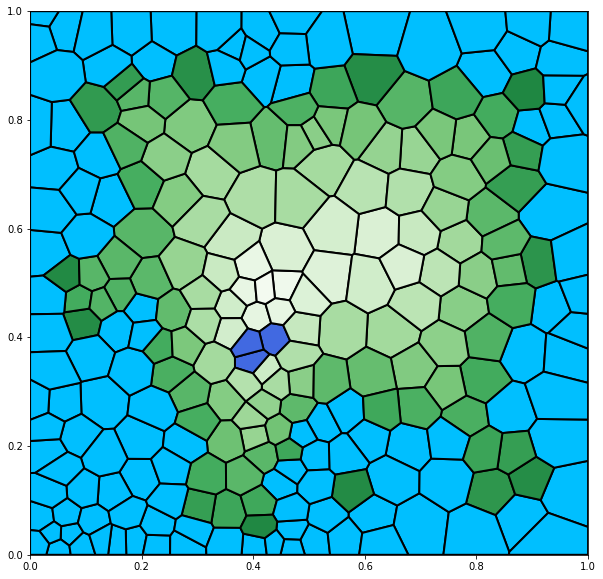

In [33]:
g.plot_full_map(plot_type='height', debug_height=False)

In [44]:
g.plot_3d_height_map()

## 10. Rivers

Rivers flow from high elevations down to the coast. <br>
Having elevations that always increase away from the coast means that there’s no local minima that complicate river generation.


In [34]:
from __future__ import absolute_import

from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

from src.voronoi import VoronoiPolygons 

%config IPCompleter.greedy=True

In [35]:
g.create_rivers(n=20, min_height=0.5)

For any location, going downhill will eventually lead to the ocean. <br>
This diagram shows the steepest downhill direction from every corner.

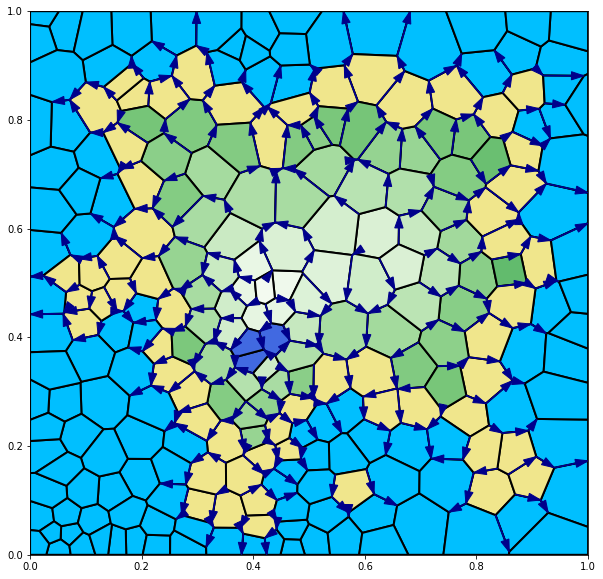

In [36]:
g.plot_full_map(plot_type='terrain', debug_height=False, downslope_arrows=True, rivers=False)

Rivers use the downhill directions shown earlier.

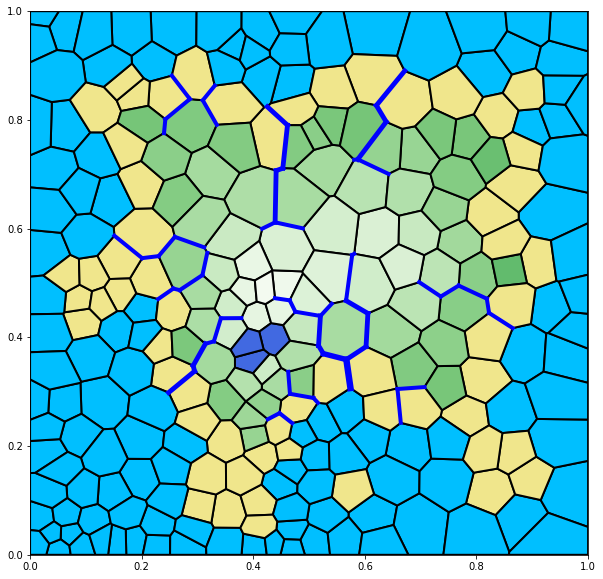

In [37]:
g.plot_full_map(plot_type='terrain', debug_height=False, downslope_arrows=False, rivers=True)

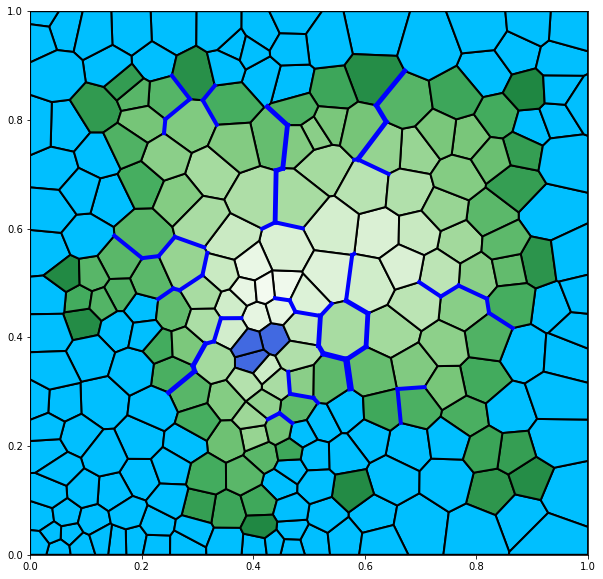

In [38]:
g.plot_full_map(plot_type='height', debug_height=False, downslope_arrows=False, rivers=True)

## Moisture

In [39]:
g.assign_moisture()

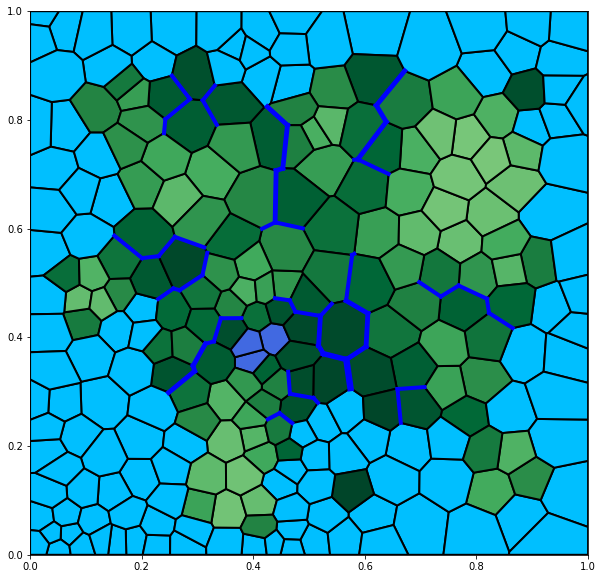

In [40]:
g.plot_full_map(
    plot_type='moisture',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

## Biomes

In [41]:
g.assign_biomes()

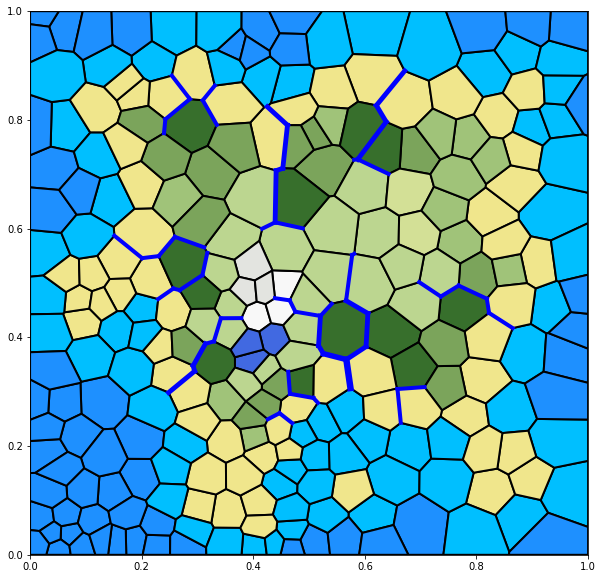

In [42]:
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

## Final maps

In [1]:
from __future__ import absolute_import

from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

from src.voronoi import VoronoiPolygons 

%config IPCompleter.greedy=True

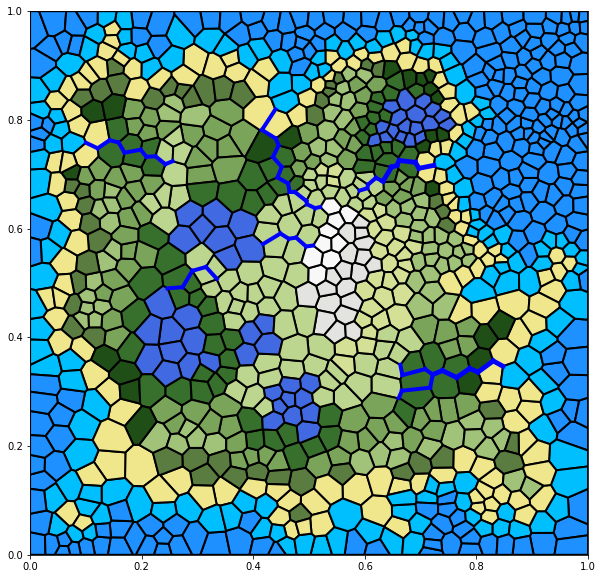

Wall time: 3min 9s


In [3]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=1000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=10, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

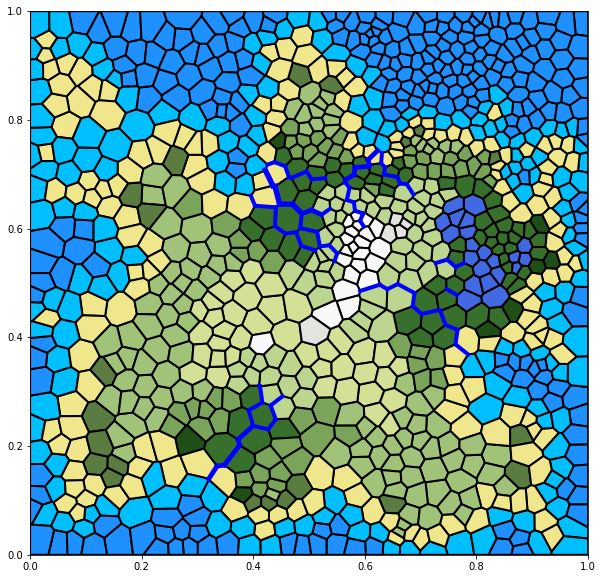

Wall time: 3min


In [2]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=1000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=20, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

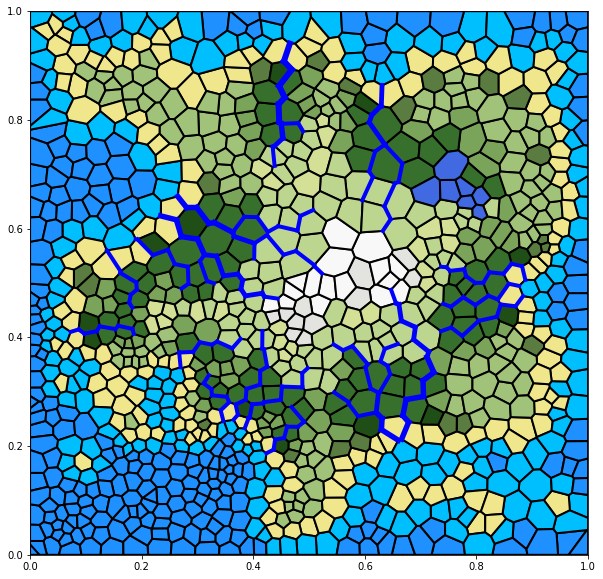

Wall time: 2min 41s


In [4]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=1000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=30, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

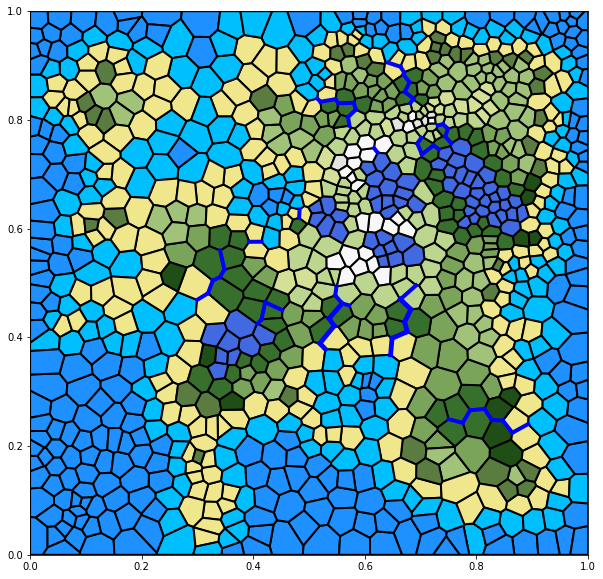

Wall time: 2min 51s


In [4]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=1000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25, lake_to_total_ratio=0.075)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=20, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

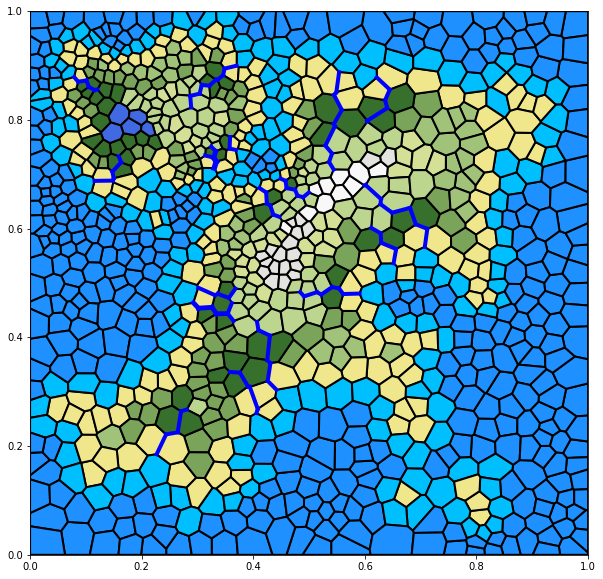

Wall time: 2min 54s


In [6]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=1000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25, ocean_to_total_ratio=0.55)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=20, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

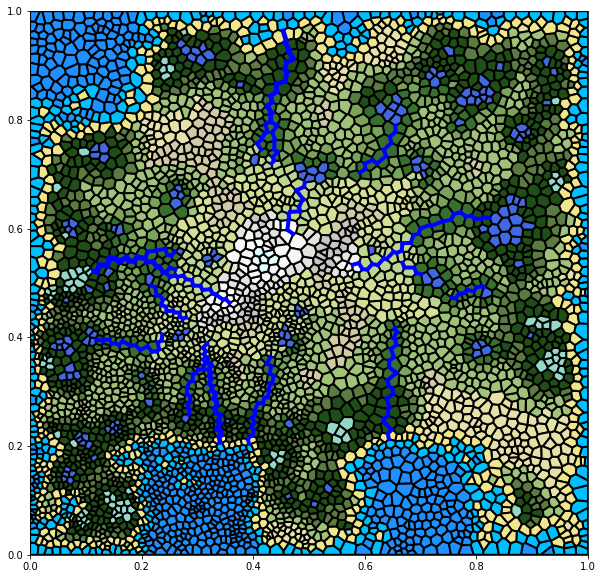

CPU times: user 46min 31s, sys: 1.77 s, total: 46min 33s
Wall time: 46min 32s


In [36]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=5000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=25, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)

In [ ]:
%%time
from src.map import Graph
from src.terrain import assign_terrain_types_to_graph
g = Graph(N=5000, iterations=2)
assign_terrain_types_to_graph(graph=g, min_water_ratio=0.25)
g.assign_corner_elevations()
g.redistribute_elevations()
g.assign_center_elevations()
g.create_rivers(n=25, min_height=0.6)
g.assign_moisture()
g.assign_biomes()
g.plot_full_map(
    plot_type='biome',
    debug_height=False, 
    debug_moisture=False, 
    downslope_arrows=False, 
    rivers=True)